<a href="https://colab.research.google.com/github/DanialNayyar/Stock-Prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [ ]:
sp500 = yf.download('^GSPC', start='1980-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-02,0.000000,108.430000,105.290001,105.760002,105.760002,40610000
1980-01-03,0.000000,106.080002,103.260002,105.220001,105.220001,50480000
1980-01-04,0.000000,107.080002,105.089996,106.519997,106.519997,39130000
1980-01-07,0.000000,107.800003,105.800003,106.809998,106.809998,44500000
1980-01-08,0.000000,109.290001,106.290001,108.949997,108.949997,53390000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


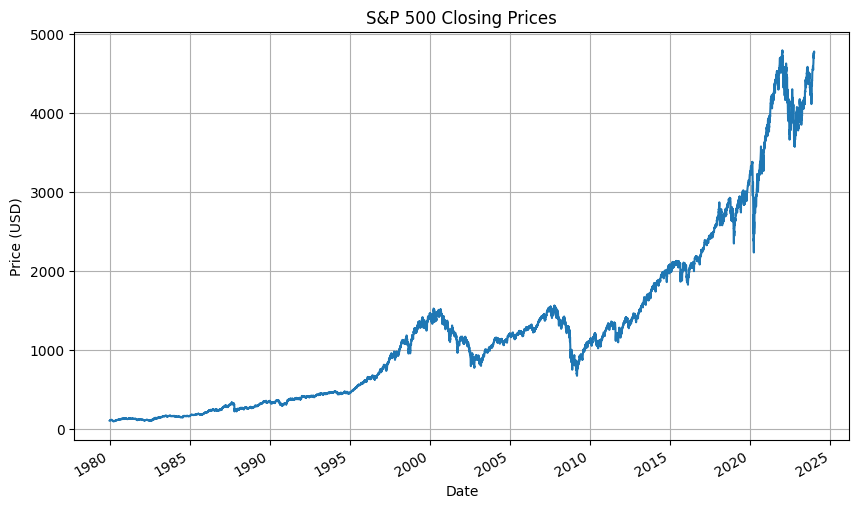

In [ ]:
plt.figure(figsize=(10, 6))
sp500['Close'].plot()
plt.title('S&P 500 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [ ]:
sp = sp500

In [ ]:
sp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-02,0.0,108.430000,105.290001,105.760002,105.760002,40610000
1980-01-03,0.0,106.080002,103.260002,105.220001,105.220001,50480000
1980-01-04,0.0,107.080002,105.089996,106.519997,106.519997,39130000
1980-01-07,0.0,107.800003,105.800003,106.809998,106.809998,44500000
1980-01-08,0.0,109.290001,106.290001,108.949997,108.949997,53390000


In [ ]:
sp["Tomorrow"] = sp["Close"].shift(-1)

In [ ]:
sp.head()

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
1980-01-02,0.0,108.430000,105.290001,105.760002,105.760002,40610000,105.220001
1980-01-03,0.0,106.080002,103.260002,105.220001,105.220001,50480000,106.519997
1980-01-04,0.0,107.080002,105.089996,106.519997,106.519997,39130000,106.809998
1980-01-07,0.0,107.800003,105.800003,106.809998,106.809998,44500000,108.949997
1980-01-08,0.0,109.290001,106.290001,108.949997,108.949997,53390000,109.050003


In [ ]:
sp["Target"]  = (sp["Tomorrow"]>sp["Close"]).astype(int)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 250, criterion="gini", max_depth = None)

In [ ]:
train = sp.iloc[:-100]
test = sp.iloc[-100:]
predictors = ["Close", "Open", "Volume", "High"]

In [ ]:
rf_clf.fit(train[predictors], train["Target"])

RandomForestClassifier(n_estimators=250)

In [ ]:
predictions = rf_clf.predict(test[predictors])

In [ ]:
predictions = pd.DataFrame(predictions, index = test.index)

In [ ]:
predictions

,0
Date,
2023-08-09,0
2023-08-10,1
2023-08-11,1
2023-08-14,1
2023-08-15,0
...,...
2023-12-22,0
2023-12-26,1
2023-12-27,1


In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(test["Target"],predictions)

0.5370370370370371

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [250, 300],
     "criterion": ["gini"],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator = rf_clf, param_grid = param_grid, scoring = "precision")


In [ ]:
grid_search.fit(train[predictors], train["Target"]) #15mins 16s
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print("Best Params: ",best_params) # ideally, should increase estimators (trees) from 300 and run it again with a max n_estimator > 300
print("Best Score: ",best_score)

Best Params:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best Score:  0.5286956472701376


Predictions with Indicator Data:

RSI & MACD

In [ ]:
pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=c44e1982d16a20134ed7932386e61660b83cfff339d8b03a18e8b2f5d4d2a889
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import ta

In [ ]:
sp['RSI'] = ta.momentum.rsi(close=sp['Close'], window=14)

In [ ]:
sp['MACD'] = ta.trend.macd_diff(close=sp['Close'], window_slow=26, window_fast=12, window_sign=9)

In [ ]:
sp

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,RSI,MACD
Date,,,,,,,,,,
1980-01-02,0.000000,108.430000,105.290001,105.760002,105.760002,40610000,105.220001,0,NaN,NaN
1980-01-03,0.000000,106.080002,103.260002,105.220001,105.220001,50480000,106.519997,1,NaN,NaN
1980-01-04,0.000000,107.080002,105.089996,106.519997,106.519997,39130000,106.809998,1,NaN,NaN
1980-01-07,0.000000,107.800003,105.800003,106.809998,106.809998,44500000,108.949997,1,NaN,NaN
1980-01-08,0.000000,109.290001,106.290001,108.949997,108.949997,53390000,109.050003,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000,4774.750000,1,71.069402,3.547671
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000,4781.580078,1,72.704374,3.357421
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000,4783.350098,1,73.256889,2.819173


In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11093 entries, 1980-01-02 to 2023-12-29
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       11093 non-null  float64
 1   High       11093 non-null  float64
 2   Low        11093 non-null  float64
 3   Close      11093 non-null  float64
 4   Adj Close  11093 non-null  float64
 5   Volume     11093 non-null  int64  
 6   Tomorrow   11092 non-null  float64
 7   Target     11093 non-null  int64  
 8   RSI        11080 non-null  float64
 9   MACD       11060 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 953.3 KB


In [ ]:
sp.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Tomorrow      1
Target        0
RSI          13
MACD         33
dtype: int64

In [ ]:
sp.dropna(axis = 0, inplace = True)

In [ ]:
predictors_2 = ["Close", "Open", "Volume", "High","RSI","MACD"]

In [ ]:
rf_clf_2 = RandomForestClassifier(n_estimators = 300, criterion="gini", max_depth = 10,min_samples_split= 2)

In [ ]:
train_2 = sp.iloc[:-100]
test_2 = sp.iloc[-100:]

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11059 entries, 1980-02-19 to 2023-12-28
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       11059 non-null  float64
 1   High       11059 non-null  float64
 2   Low        11059 non-null  float64
 3   Close      11059 non-null  float64
 4   Adj Close  11059 non-null  float64
 5   Volume     11059 non-null  int64  
 6   Tomorrow   11059 non-null  float64
 7   Target     11059 non-null  int64  
 8   RSI        11059 non-null  float64
 9   MACD       11059 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 950.4 KB


In [ ]:
rf_clf_2.fit(train_2[predictors_2], train_2["Target"])

RandomForestClassifier(max_depth=10, n_estimators=300)

In [ ]:
prediction_2=rf_clf_2.predict(test_2[predictors_2])

In [ ]:
prediction_2 =  pd.DataFrame(prediction_2, index = test_2.index)

In [ ]:
print(prediction_2)

            0
Date         
2023-08-08  0
2023-08-09  1
2023-08-10  0
2023-08-11  0
2023-08-14  0
...        ..
2023-12-21  0
2023-12-22  0
2023-12-26  0
2023-12-27  0
2023-12-28  0

[100 rows x 1 columns]


In [ ]:
precision_score(test["Target"],prediction_2)# indicators caused an increase of 3% in precision score?

0.5641025641025641

Training on 2020-2023

Testing on 2024

In [ ]:
sp2 = yf.download('^GSPC', start='2020-01-01', end='2024-05-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
sp2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000
...,...,...,...,...,...,...
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000
2024-04-25,5019.879883,5057.750000,4990.580078,5048.419922,5048.419922,3958050000
2024-04-26,5084.649902,5114.620117,5073.140137,5099.959961,5099.959961,3604140000


In [ ]:
sp2['MACD'] = ta.trend.macd_diff(close=sp['Close'], window_slow=26, window_fast=12, window_sign=9)

In [ ]:
sp2['RSI'] = ta.momentum.rsi(close=sp['Close'], window=14)

In [ ]:
sp2.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,MACD
Date,,,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000,75.482971,2.219142
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000,65.738893,0.751910
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000,67.952910,0.210848
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000,64.385487,-1.032005
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000,67.581833,-1.053681


In [ ]:
sp2["Tomorrow"] = sp2["Close"].shift(-1)

In [ ]:
sp2.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,MACD,Tomorrow
Date,,,,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000,75.482971,2.219142,3234.850098
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000,65.738893,0.751910,3246.280029
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000,67.952910,0.210848,3237.179932
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000,64.385487,-1.032005,3253.050049
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000,67.581833,-1.053681,3274.699951


In [ ]:
predictors_3 = ["Close", "Open", "Volume", "High","RSI","MACD"]

In [ ]:
rf_clf_3 = RandomForestClassifier(n_estimators = 300, criterion="gini", max_depth = 10,min_samples_split= 2)

In [ ]:
sp2["Target"]  = (sp2["Tomorrow"]>sp2["Close"]).astype(int)

In [ ]:
sp2.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,MACD,Tomorrow,Target
Date,,,,,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000,75.482971,2.219142,3234.850098,0
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000,65.738893,0.751910,3246.280029,1
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000,67.952910,0.210848,3237.179932,0
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000,64.385487,-1.032005,3253.050049,1
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000,67.581833,-1.053681,3274.699951,1


In [ ]:
train_2 = sp2.iloc[:-100]
test_2 = sp2.iloc[-100:]

In [ ]:
rf_clf_3.fit(train_2[predictors_3], train_2["Target"])

RandomForestClassifier(max_depth=10, n_estimators=300)

In [ ]:
predictors_3 = ["Close", "Open", "Volume", "High","RSI","MACD"]

In [ ]:
sp2.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
RSI          84
MACD         84
Tomorrow      1
Target        0
dtype: int64

In [ ]:
sp2.dropna(axis = 0, inplace = True)

In [ ]:
train_2 = sp2.iloc[:-100]
test_2 = sp2.iloc[-100:]

In [ ]:
prediction_3 = rf_clf_3.predict(test_2[predictors_3])

In [ ]:
prediction_3 =  pd.DataFrame(prediction_3, index = test_2.index)

In [ ]:
prediction_3

,0
Date,
2023-08-08,0
2023-08-09,1
2023-08-10,0
2023-08-11,1
2023-08-14,0
...,...
2023-12-21,0
2023-12-22,0
2023-12-26,0


In [ ]:
precision_score(test_2["Target"],prediction_3)# indicators caused an increase of 3% in precision score?

0.9795918367346939

In [ ]:
print(""" Predictions:
"""
,prediction_3.value_counts())

 Predictions:
 0    51
1    49
Name: count, dtype: int64


In [ ]:
print(
test_2["Target"].value_counts())

Target
1    57
0    43
Name: count, dtype: int64
